In [243]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')

df = pd.read_csv('data/wine.csv')
df['quality_ord'] = pd.cut(df['quality'], bins = [0, 5, 6, 9],
       labels = ['low', 'medium', 'high'])


In [244]:
import numpy as np 
from scipy import stats
#df = df[(np.abs (stats.zscore (df['pH'])) < 2.5)]

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   object  
 13  quality_ord           6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [246]:
df['quality_ord'].value_counts()

medium    2836
low       2384
high      1277
Name: quality_ord, dtype: int64

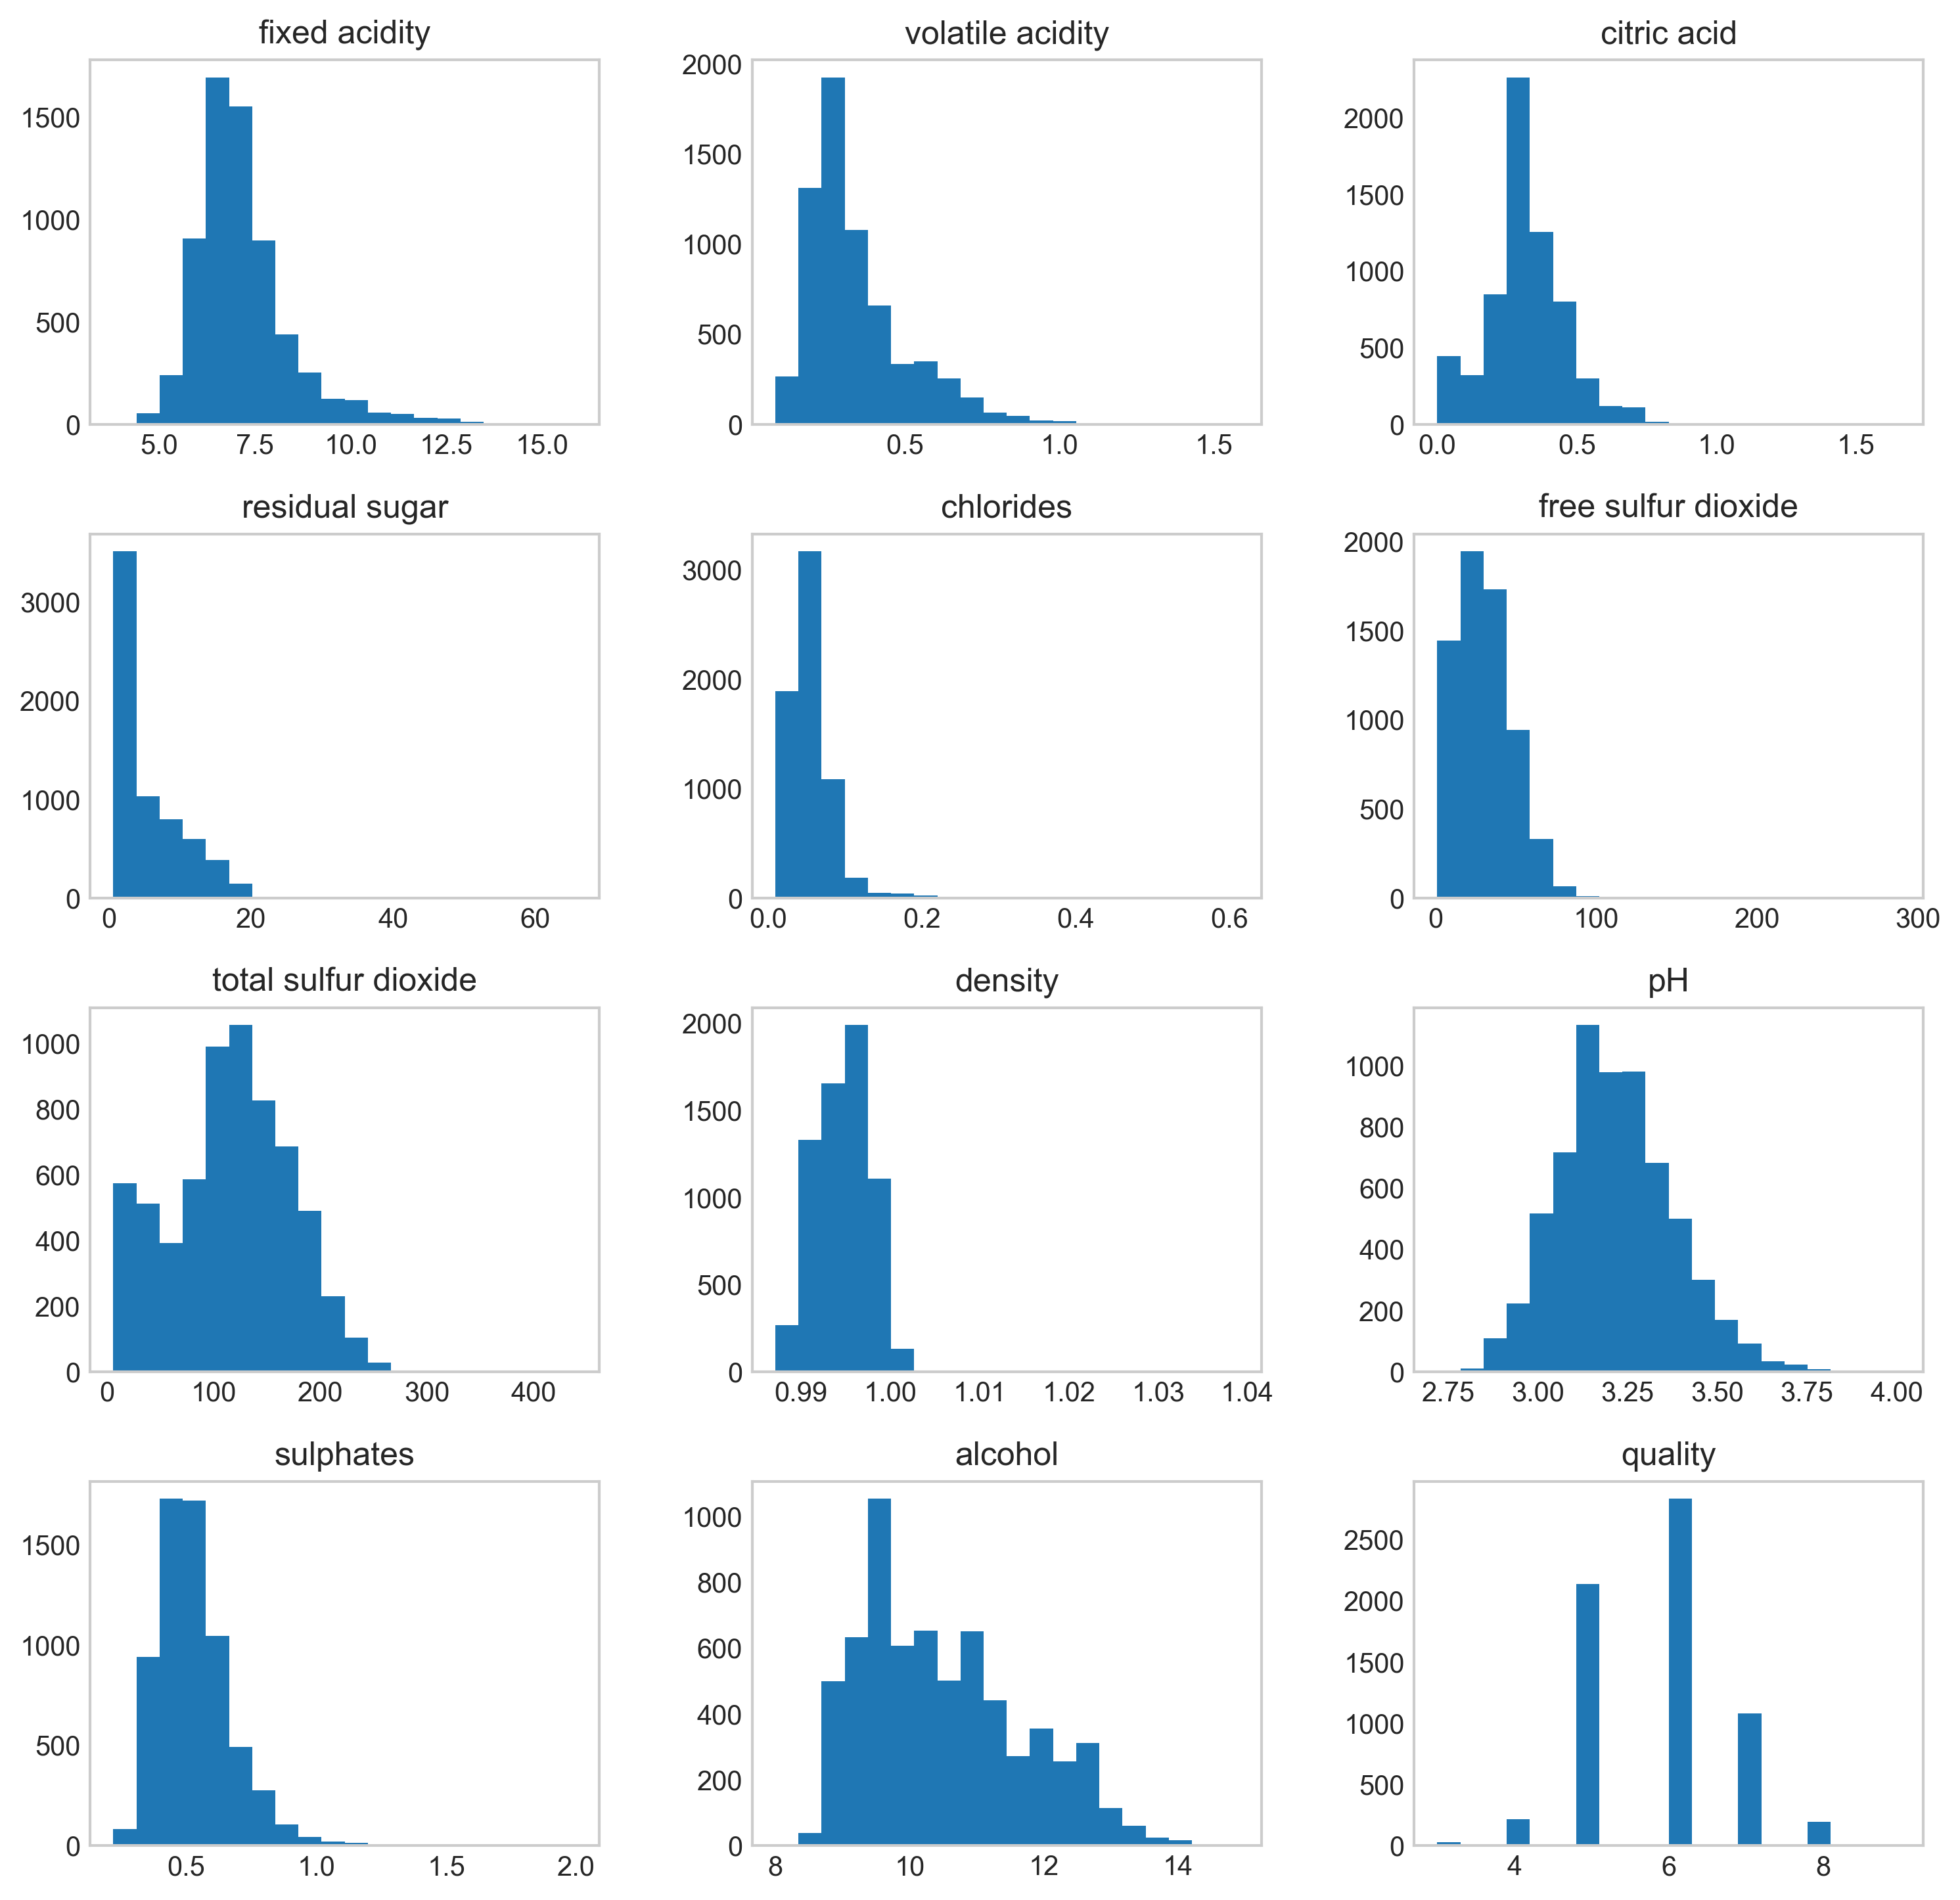

In [247]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

In [248]:
dv = 'pH'
iv = 'quality_ord'

df.groupby(iv).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_ord,,,,,,,,,,,,
low,7.329992,0.397410,0.304178,5.646225,0.064404,29.480495,119.277055,0.995756,3.214522,0.524270,9.873544,4.884228
medium,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553,6.000000
high,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966


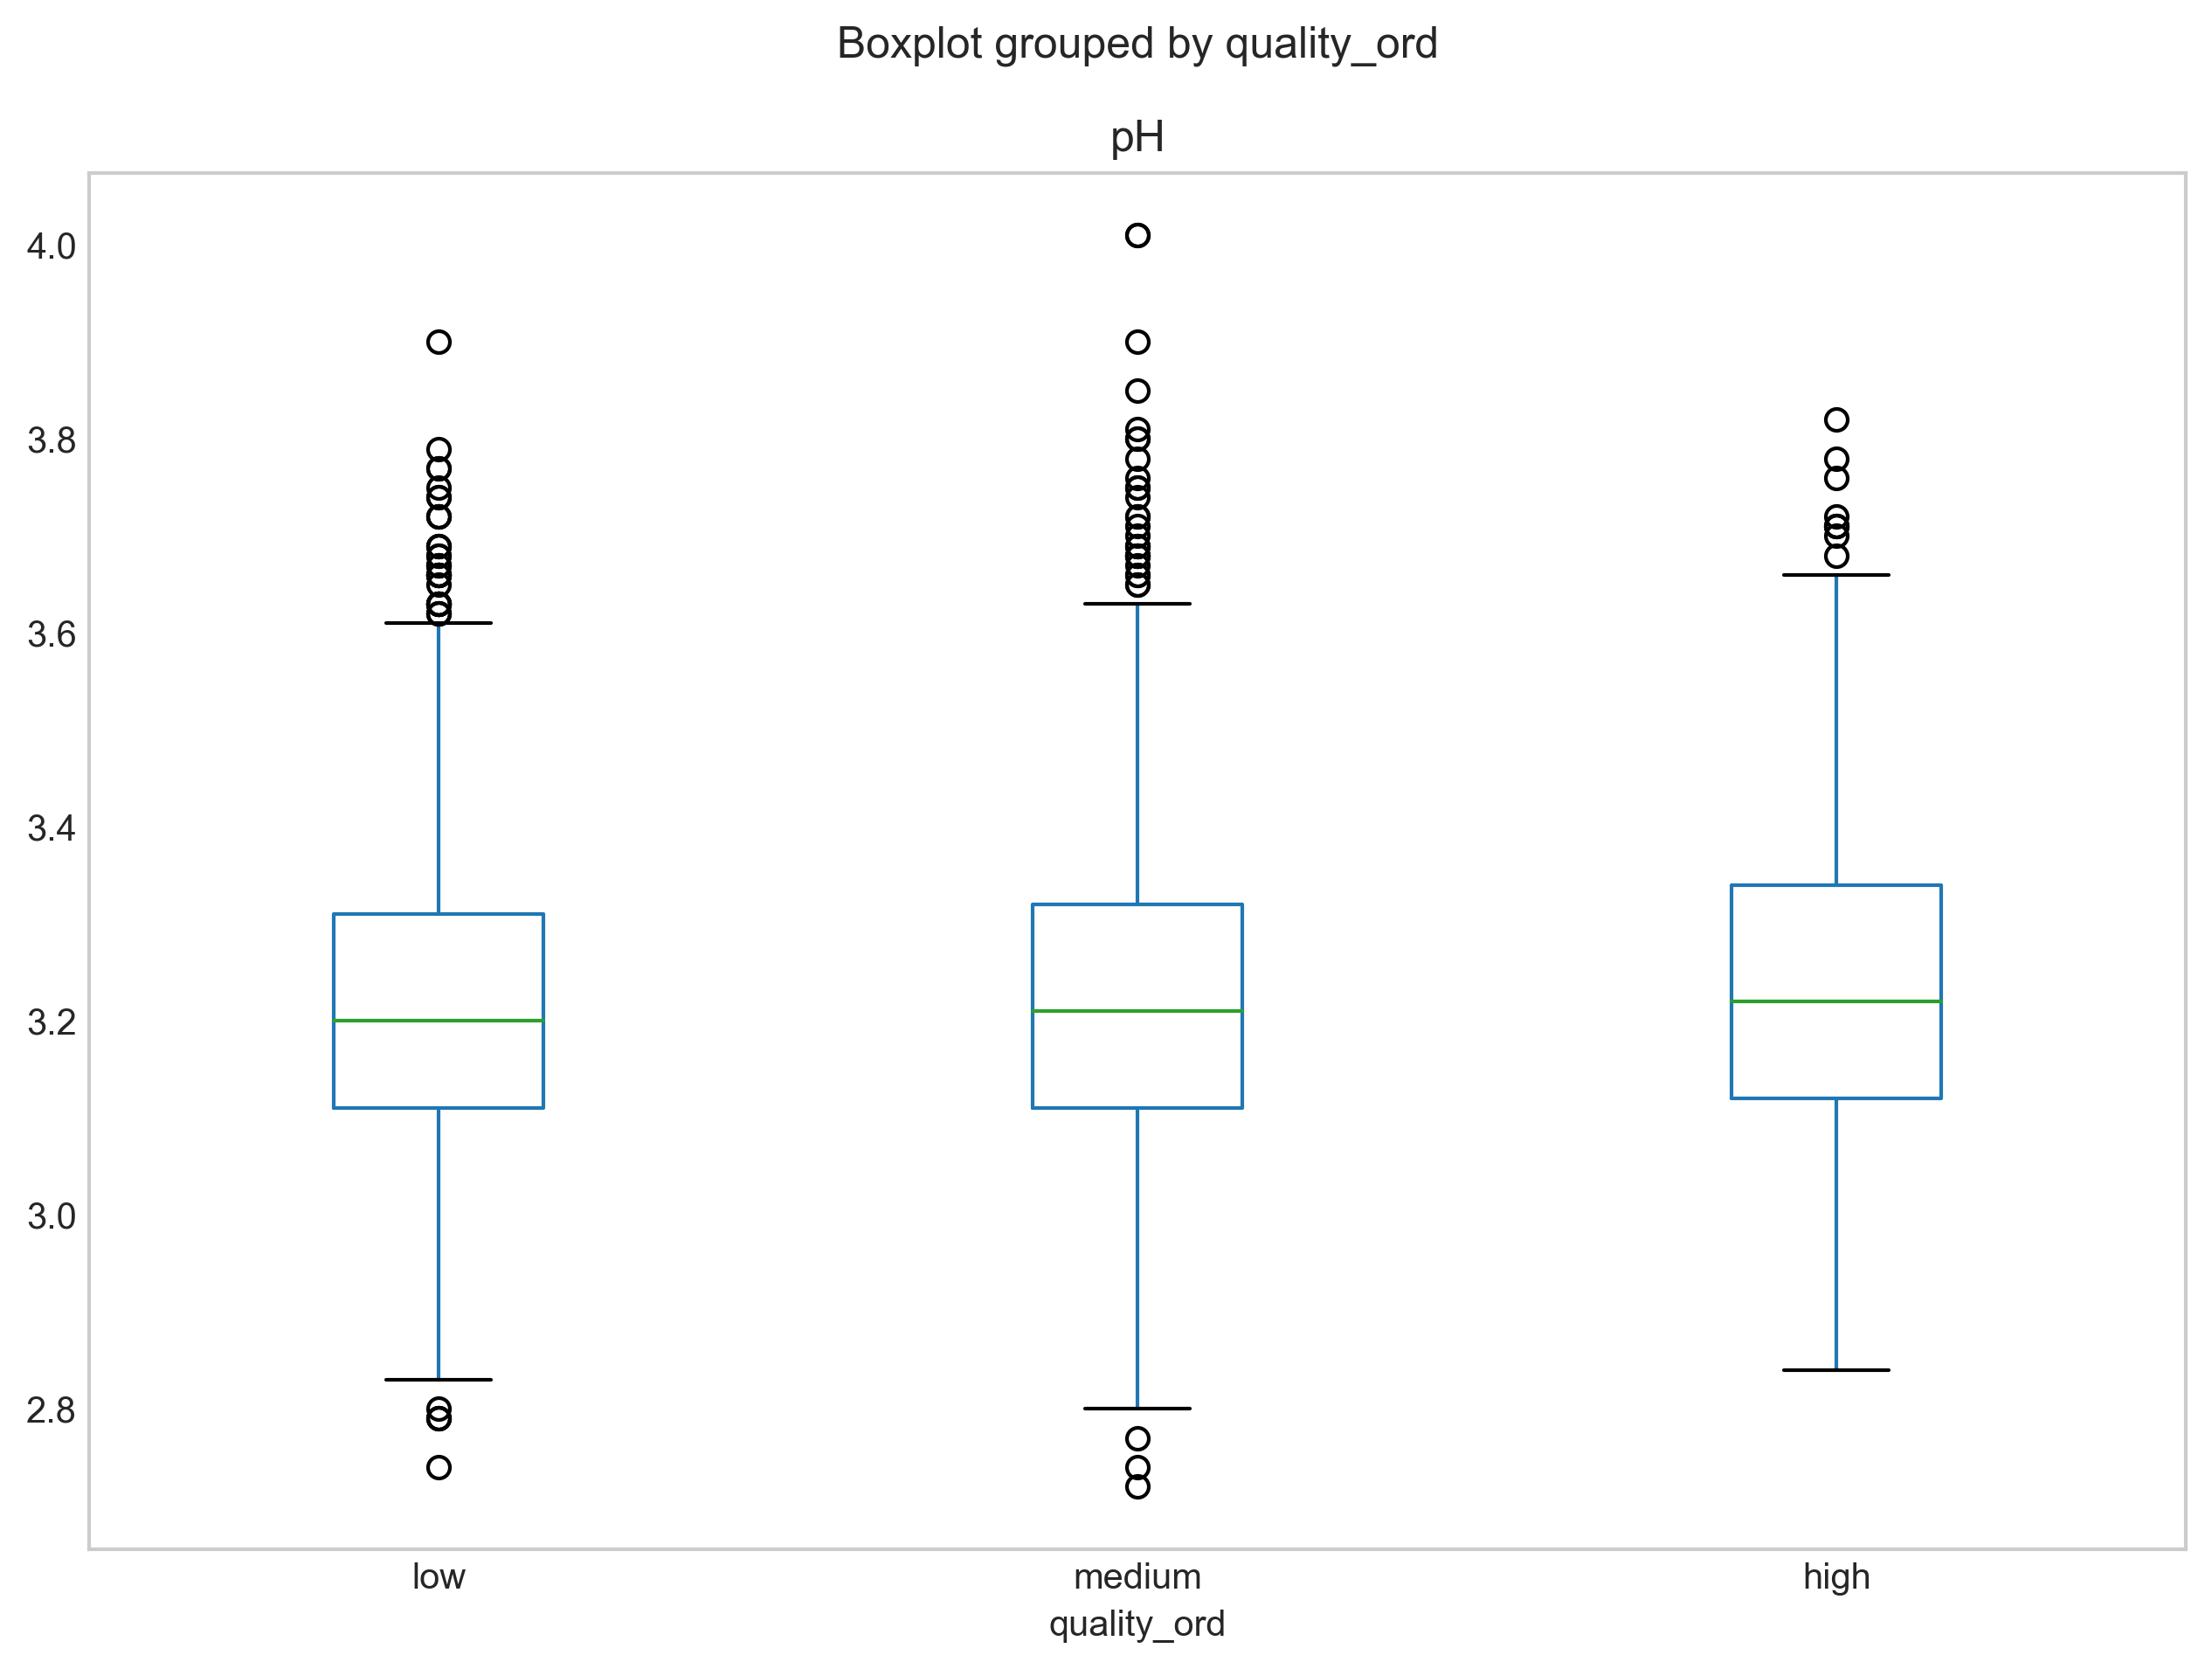

In [249]:
df.boxplot(column = dv, by = iv, figsize = (10,7), grid = False)

plt.show()

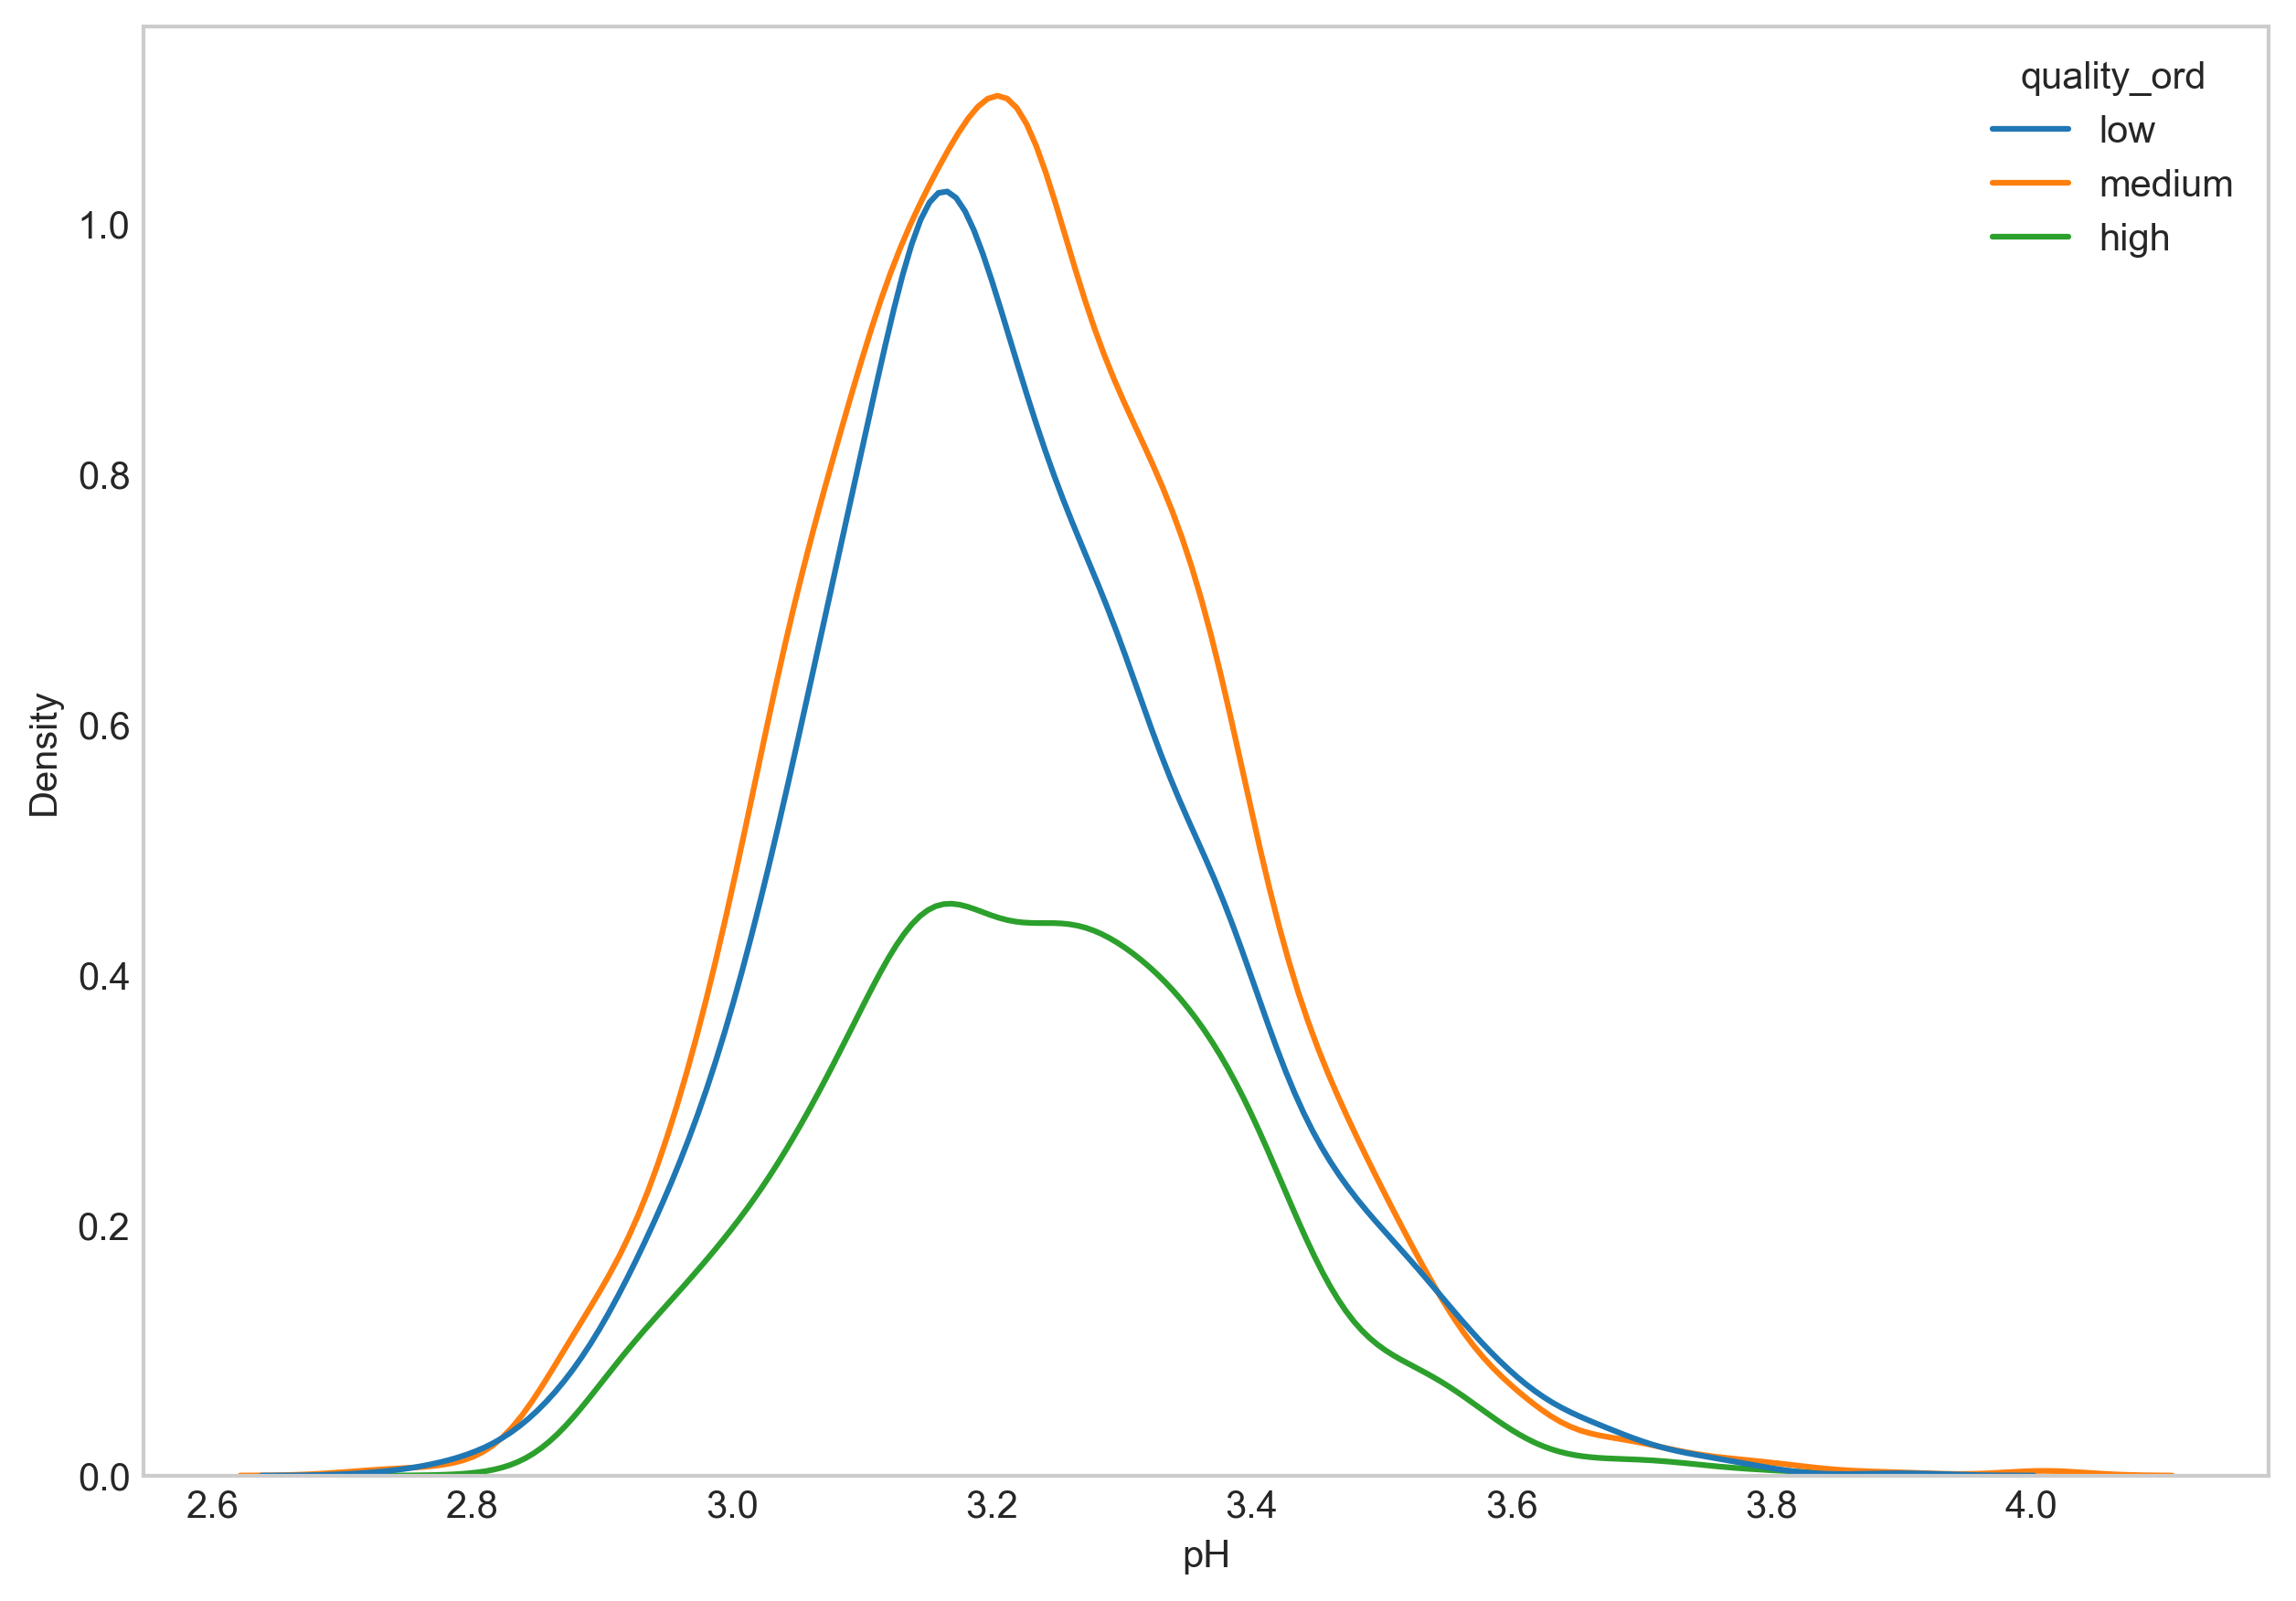

,W,pval,normal
low,0.987153,7.860370e-14,False
medium,0.990874,1.821434e-12,False
high,0.992996,9.673136e-06,False


In [250]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.grid(False)

sns.kdeplot(data = df, x = dv, hue = iv, ax = ax)
plt.show()

pg.normality(df, dv = dv, group = iv, method = 'shapiro')

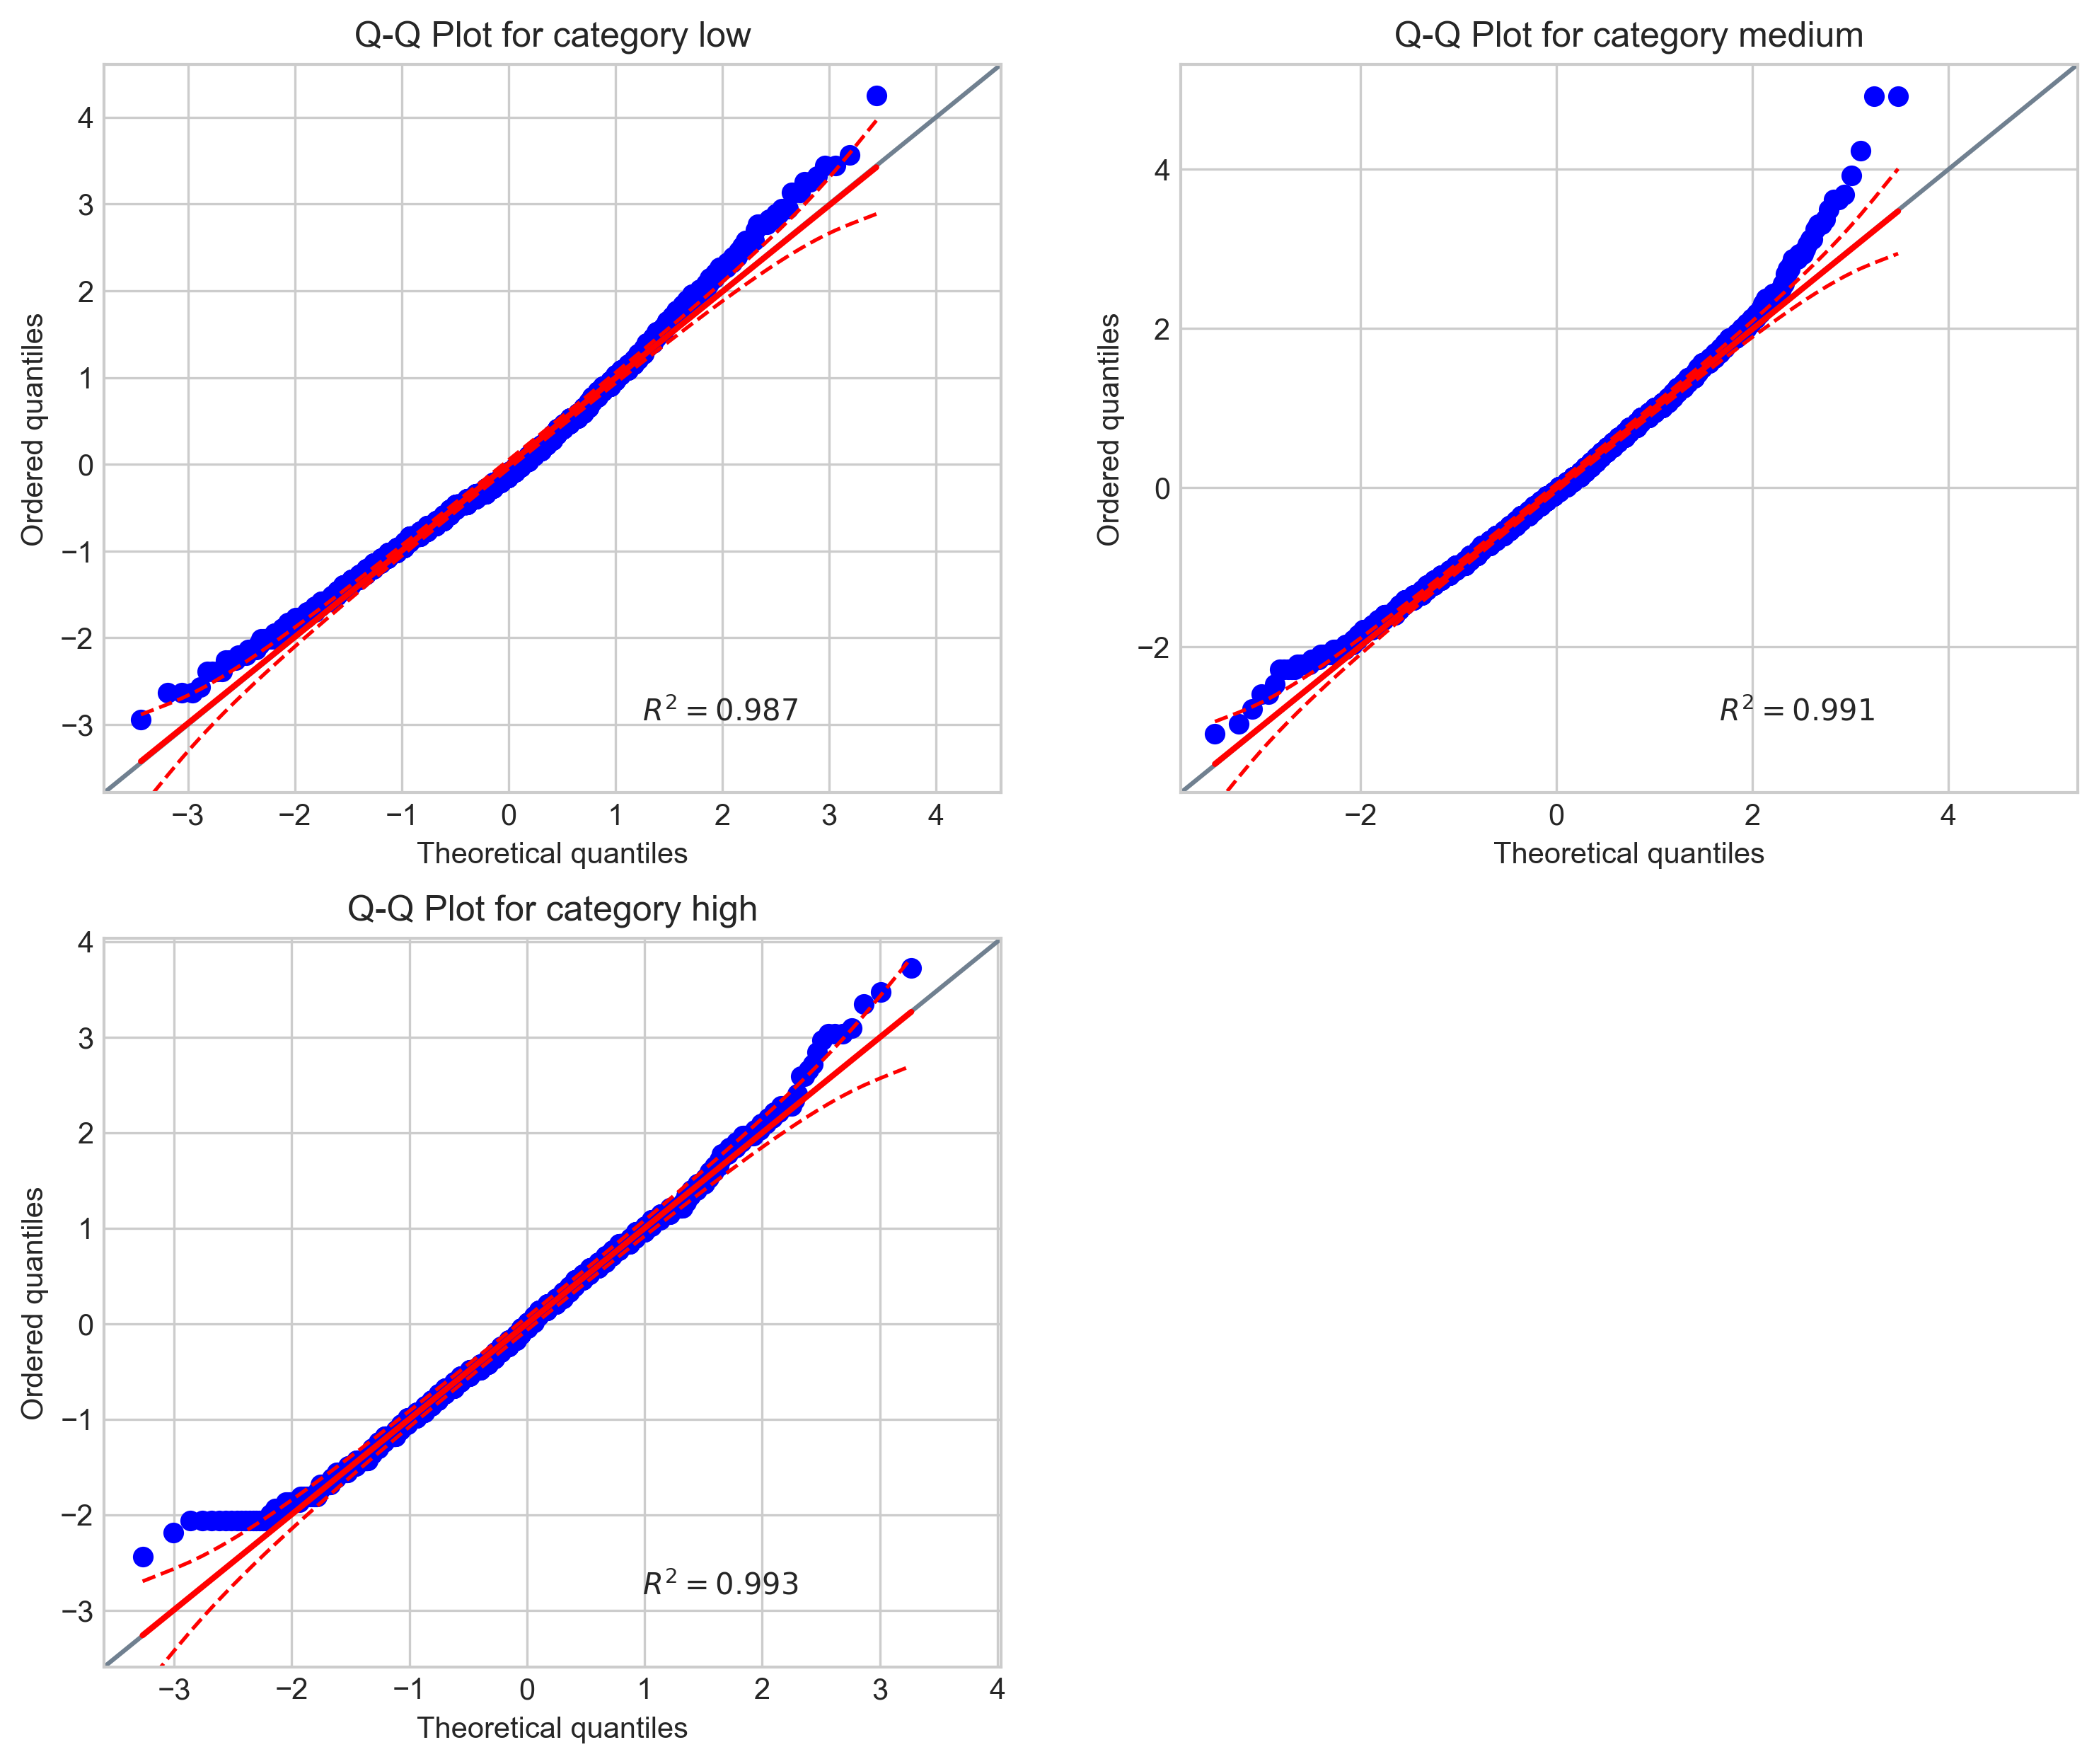

In [251]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes[1,1].set_axis_off()

categories = ['low', 'medium', 'high']

for ax, cat in zip(axes.flatten(), categories):
    mask = df[iv] == cat
    sample = df.loc[mask, dv]
    pg.qqplot(sample, ax = ax)
    ax.set_title(f"Q-Q Plot for category {cat}")

In [254]:
pg.kruskal(df, dv = dv, between = iv)

,Source,ddof1,H,p-unc
Kruskal,quality_ord,2,9.082055,0.010662


In [253]:
pg.pairwise_tests(df, dv = dv, between = iv, parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,quality_ord,low,medium,False,False,3313312.5,two-sided,0.215253,-0.019879
1,quality_ord,low,high,False,False,1430977.5,two-sided,0.002763,-0.081762
2,quality_ord,medium,high,False,False,1736692.5,two-sided,0.035452,-0.061861
